# Using telco_churn database, predict total charges

Using the telco_churn database, extract a table for each customer with a 2-year contract and include the following information customer id, tenure, monthly charges, and total charges.

In [117]:
%matplotlib inline

import numpy as np

# Wrangling
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

#Exploring
import scipy.stats as stats

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.feature_selection import f_regression

Read the information from the customers table into a dataframe.

In [2]:
customers = pd.read_csv('2year_telco_customers.csv')
customers.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.8
2,0016-QLJIS,65,90.45,5957.9
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


How many rows are in your dataframe?

In [3]:
customers.shape[0]

1695

What is the data type of the field containing the customer ids?

In [4]:
customers.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

They are strings.

Print to the notebook the last 10 rows of your dataframe.

In [5]:
customers.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.3
1688,9958-MEKUC,72,103.95,7517.7
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.6


What is the inner quartile range of tenure? monthly charges? total charges?

In [6]:
customers.describe()

,tenure,monthly_charges
count,1695.000000,1695.000000
mean,56.735103,60.770413
std,18.209363,34.678865
min,0.000000,18.400000
25%,48.000000,24.025000
50%,64.000000,64.350000
75%,71.000000,90.450000
max,72.000000,118.750000


Total charges not showing up for describe method. That column's data type is a string.

In [7]:
customers.loc[customers.tenure == 0]

,customer_id,tenure,monthly_charges,total_charges
234,1371-DWPAZ,0,56.05,
416,2520-SGTTA,0,20.00,
453,2775-SEFEE,0,61.90,
505,3115-CZMZD,0,20.25,
524,3213-VVOLG,0,25.35,
678,4075-WKNIU,0,73.35,
716,4367-NUYAO,0,25.75,
726,4472-LVYGI,0,52.55,
941,5709-LVOEQ,0,80.85,
1293,7644-OMVMY,0,19.85,


In [8]:
customers.loc[customers.total_charges == ' ']

,customer_id,tenure,monthly_charges,total_charges
234,1371-DWPAZ,0,56.05,
416,2520-SGTTA,0,20.00,
453,2775-SEFEE,0,61.90,
505,3115-CZMZD,0,20.25,
524,3213-VVOLG,0,25.35,
678,4075-WKNIU,0,73.35,
716,4367-NUYAO,0,25.75,
726,4472-LVYGI,0,52.55,
941,5709-LVOEQ,0,80.85,
1293,7644-OMVMY,0,19.85,


In [183]:
customers.isnull().sum()

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64

Fill any missing values with 0.

In [185]:
customers.total_charges.value_counts()

0.00       10
1110.05     2
5714.20     2
1161.75     2
343.45      2
844.45      2
3533.60     2
5682.25     2
7334.05     2
4861.45     1
1218.45     1
5986.55     1
331.60      1
4946.70     1
5746.75     1
1311.30     1
1188.25     1
3522.65     1
1046.20     1
3952.65     1
743.50      1
1208.60     1
4237.50     1
7852.40     1
7517.70     1
1025.05     1
4523.25     1
1102.40     1
1654.85     1
3121.40     1
           ..
1654.60     1
258.35      1
1049.60     1
2560.10     1
1715.15     1
6375.80     1
3371.00     1
3389.25     1
7171.70     1
7774.05     1
4903.20     1
498.10      1
2893.40     1
6457.15     1
7782.85     1
1355.10     1
4220.35     1
902.00      1
7542.25     1
7544.00     1
1377.70     1
1388.45     1
4447.55     1
1016.70     1
2313.80     1
7806.50     1
4378.90     1
4677.10     1
641.35      1
400.00      1
Name: total_charges, Length: 1678, dtype: int64

In [9]:
customers['total_charges'] = customers['total_charges'].replace(' ', 0)
customers.total_charges = customers.total_charges.astype(float)

In [10]:
customers.loc[customers.total_charges == 0]

,customer_id,tenure,monthly_charges,total_charges
234,1371-DWPAZ,0,56.05,0.0
416,2520-SGTTA,0,20.00,0.0
453,2775-SEFEE,0,61.90,0.0
505,3115-CZMZD,0,20.25,0.0
524,3213-VVOLG,0,25.35,0.0
678,4075-WKNIU,0,73.35,0.0
716,4367-NUYAO,0,25.75,0.0
726,4472-LVYGI,0,52.55,0.0
941,5709-LVOEQ,0,80.85,0.0
1293,7644-OMVMY,0,19.85,0.0


In [11]:
customers.dtypes

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [12]:
desc = customers.describe()
desc

,tenure,monthly_charges,total_charges
count,1695.000000,1695.000000,1695.000000
mean,56.735103,60.770413,3706.934336
std,18.209363,34.678865,2579.517834
min,0.000000,18.400000,0.000000
25%,48.000000,24.025000,1269.675000
50%,64.000000,64.350000,3593.800000
75%,71.000000,90.450000,5988.800000
max,72.000000,118.750000,8672.450000


What is the inner quartile range of tenure? monthly charges? total charges?

In [182]:
def IQR(column):
    return column.iloc[6] - column.iloc[4]

print(f'IQR for tenure is: {IQR(desc.tenure)}')
print(f'IQR for monthly charges is: {IQR(desc.monthly_charges)}')
print(f'IQR for total charges is: {IQR(desc.total_charges)}')

from scipy.stats import iqr
iqr(customers.tenure)

IQR for tenure is: 23.0
IQR for monthly charges is: 66.42500000000001
IQR for total charges is: 4719.125


23.0

Show the ditribution of monthly charges through a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c201a1a20>]],
      dtype=object)

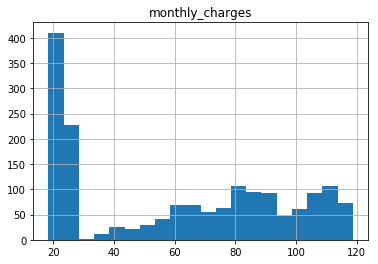

In [186]:
customers.hist(column='monthly_charges', bins=20)

Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.

In [15]:
no_id = customers.drop(['customer_id'], axis=1)
no_id.head()

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75


Create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

Text(0.5, 1.0, 'Total Charges')

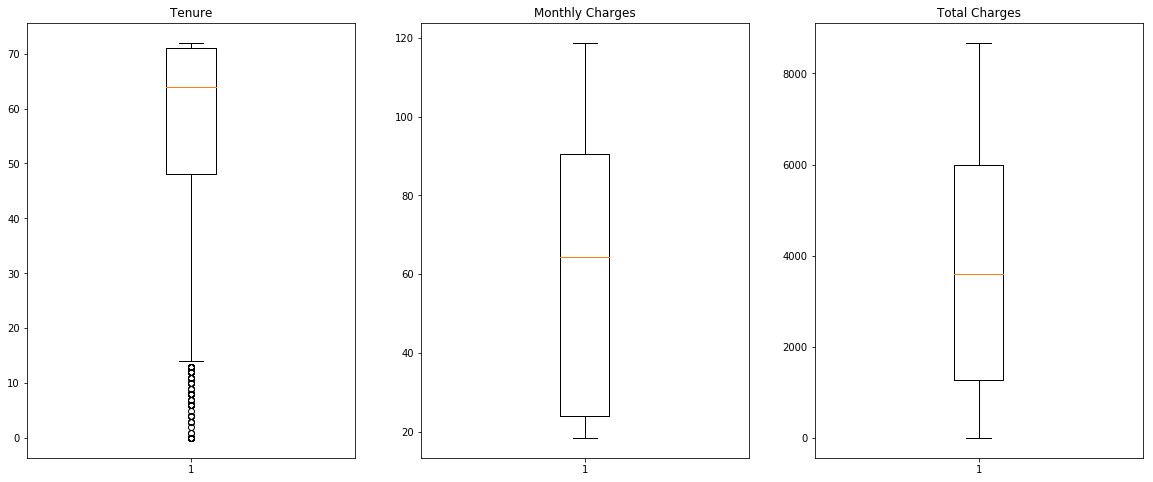

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(131)
plt.boxplot(no_id.tenure)
plt.title('Tenure')

plt.subplot(132)
plt.boxplot(no_id.monthly_charges)
plt.title('Monthly Charges')

plt.subplot(133)
plt.boxplot(no_id.total_charges)
plt.title('Total Charges')

In [18]:
no_id.head()

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75


In [19]:
X = no_id.drop('total_charges', axis=1)
y = no_id[['total_charges']]

print(X.head())
print(y.head())

   tenure  monthly_charges
0      71           109.70
1      63            84.65
2      65            90.45
3      54            45.20
4      72           116.80
   total_charges
0        7904.25
1        5377.80
2        5957.90
3        2460.55
4        8456.75


Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1356, 2)
(339, 2)
(1356, 1)
(339, 1)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print(train.shape)
print(test.shape)

(1356, 3)
(339, 3)


In [24]:
test.shape[0] / (test.shape[0] + train.shape[0])

0.2

Using the in-sample data (X_train and y_train)

Create a scatterplot for each combination of variables.

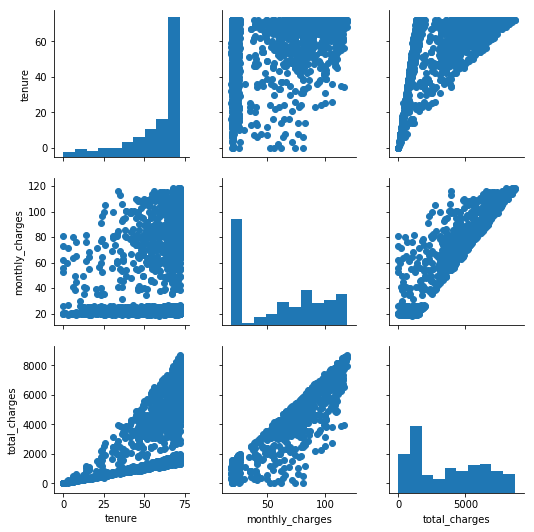

In [35]:
c = sns.PairGrid(train)
c.map_diag(plt.hist)
c.map_offdiag(plt.scatter);

Create a heatmap containing the 3 variables.

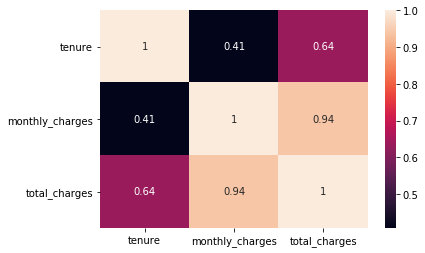

In [37]:
sns.heatmap(train.corr(), annot=True)

Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"

In [61]:
pearsonr(train.tenure, train.total_charges)

for col in train:
#     print(col)
    if col == 'total_charges':
        break
    tup = pearsonr(train[col], train.total_charges)
#     print(tup)
    r = tup[0]
    p = tup[1]
    print(f'For {col}, Pearson\'s R is {r:.4} with a significance p_value of {p:.4}.')
    
    
    

For tenure, Pearson's R is 0.635 with a significance p_value of 5.692e-154.
For monthly_charges, Pearson's R is 0.9417 with a significance p_value of 0.0.


In [55]:
print(pearsonr(X_train[['tenure']], y_train))
print(pearsonr(X_train[['monthly_charges']], y_train))

(array([0.63500211]), array([5.69213682e-154]))
(array([0.94171495]), array([0.]))


Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [179]:
ols_model = sm.OLS(y_train, X_train)
print(ols_model)
fit = ols_model.fit()
print(fit)
fit.summary()
# fit.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:43:18   Log-Likelihood:                -11134.
No. Observations:                1356   AIC:                         2.227e+04
Df Residuals:                    1354   BIC:                         2.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tenure              7.7532      0.885      8.764      0.000       6.018       9.489
monthly_charges    57.4366      0.752     76.399      0.000      55.962      58.911
==============================================================================
Omnibus:                      233.389   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.251
Skew:                          -0.961   Prob(JB):                    4.37e-116
Kurtosis:                       5.390   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
lm1 = LinearRegression(fit_intercept=False)
print(lm1)

# lm2 = LinearRegression(fit_intercept=False)
# lm2.fit(X_train[['tenure', 'monthly_charges']], y_train)
# print(lm2.coef_)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
[[ 7.75324718 57.43655053]]


In [193]:
lm1.fit(X_train[['tenure']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.

What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.


In [196]:
lm1_intercept = lm1.intercept_
lm1_coefficient = lm1.coef_

print(f'When tenure is 0, total charges is {lm1_intercept}')
print(f'When tenure increases by one month, total charges increase by {lm1_coefficient[0][0]}')

When tenure is 0, total charges is 0.0
When tenure increases by one month, total charges increase by 67.81557644185553


Write the linear function in the form of 

`y = mx + b`

using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.

In [190]:
print('The parameters for the regression model is as follows:')
print('    y-intercept = %.2f' % lm1_intercept)
print('    tenure coefficient = %.2f' % lm1_coefficient)

The parameters for the regression model is as follows:
    y-intercept = 0.00
    tenure coefficient = 67.82


In [167]:
print('Here is the regression function:')
print(f'total charges = {lm1_coefficient[0][0]:.4} * tenure + {lm1_intercept}')
function = f'total charges = {lm1_coefficient[0][0]:.4} * tenure + {lm1_intercept}'

Here is the regression function:
total charges = 67.82 * tenure + 0.0


Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

In [112]:
lm1_predict_train = lm1.predict(X_train[['tenure']])

Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

In [113]:
lm1_train_mse = mean_squared_error(y_train, lm1_predict_train)
print(f'MSE: {lm1_train_mse}')

lm1_train_mae = median_absolute_error(y_train, lm1_predict_train)
print(f'MAE: {lm1_train_mae}')

lm1_train_r2 = r2_score(y_train, lm1_predict_train)
print(f'R^2: {lm1_train_r2}')

MSE: 4213606.416200152
MAE: 1731.3266353372169
R^2: 0.3746335730051228


Using the out-of-sample data (X_test, y_test)

Test your model on the test sample.

In [115]:
lm1_predict_test = lm1.predict(X_test[['tenure']])

Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [116]:
lm1_test_mse = mean_squared_error(lm1_predict_test, y_test)
print(f'MSE: {lm1_test_mse}')

lm1_test_mae = median_absolute_error(lm1_predict_test, y_test)
print(f'MAE: {lm1_test_mae}')

lm1_test_r2 = r2_score(lm1_predict_test, y_test)
print(f'R^2: {lm1_test_r2}')

MSE: 3881232.746445619
MAE: 1586.2657393950421
R^2: -1.4782566059390434


Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [130]:
f_reg_tenure_train = f_regression(X_train[['tenure']], y_train.total_charges)
f_value_tenure_train = f_reg_tenure_train[0][0]
p_value_tenure_train = f_reg_tenure_train[1][0]

print(f'The f-value for tenure in the training sample is: {f_value_tenure_train}')
print(f'The p-value for tenure in the training sample is: {p_value_tenure_train}')

The f-value for tenure in the training sample is: 914.8719699226864
The p-value for tenure in the training sample is: 5.692136817603649e-154


In [131]:
f_reg_tenure_test = f_regression(X_test[['tenure']], y_test.total_charges)
f_value_tenure_test = f_reg_tenure_test[0][0]
p_value_tenure_test = f_reg_tenure_test[1][0]

print(f'The f-value for tenure in the test sample is: {f_value_tenure_test}')
print(f'The p-value for tenure in the test sample is: {p_value_tenure_test}')

The f-value for tenure in the test sample is: 231.67183910026947
The p-value for tenure in the test sample is: 3.4865119336497282e-40


Create a scatter plot of the predicted values versus the actual values in the test sample.

In [136]:
pred_and_actual = pd.DataFrame({'actual':y_test.total_charges,
                                'lm1_pred':lm1_predict_test.ravel()})

In [139]:
pred_and_actual.head()

,actual,lm1_pred
252,220.80,678.155764
632,4707.85,4272.381316
472,1462.05,4747.090351
1029,6330.40,4272.381316
910,5999.85,4814.905927


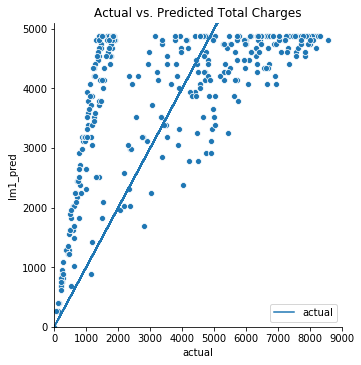

In [158]:
sns.relplot(data=pred_and_actual, x='actual', y='lm1_pred')
plt.plot(pred_and_actual.actual, pred_and_actual.actual)
plt.xlim(0,9000)
plt.ylim(0,5100)
plt.title('Actual vs. Predicted Total Charges')
plt.legend()

Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.

In [160]:
actual_x_and_y = pd.DataFrame({'tenure':X_test.tenure,
                               'total_charges':y_test.total_charges.ravel()})
actual_x_and_y.head()

,tenure,total_charges
252,10,220.80
632,63,4707.85
472,70,1462.05
1029,63,6330.40
910,71,5999.85


Text(0.5, 1.0, 'Actual test values for tenure and total charges')

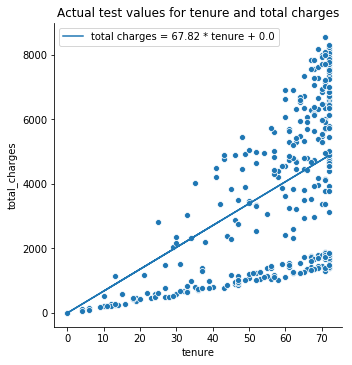

In [198]:
sns.relplot(data=actual_x_and_y, x='tenure', y='total_charges')
plt.plot(X_test.tenure, lm1_predict_test, label=function)
plt.legend()
plt.title('Actual test values for tenure and total charges')

Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

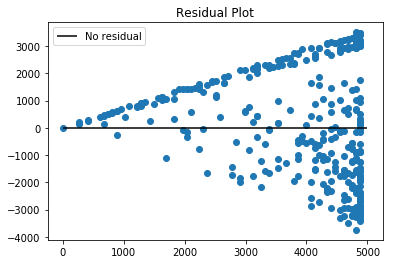

In [174]:
plt.scatter(lm1_predict_test, (lm1_predict_test-y_test))
plt.hlines(y=0, xmin=0, xmax=5000, label='No residual')
plt.title('Residual Plot')
plt.legend()